In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df_url = 'https://drive.google.com/uc?id=1DsnhoOgxWdAv8gN2FqdtmLgCkO8R4vSC'
df = pd.read_csv(df_url)
df.head()

,address,categories/0,categoryName,cid,city,countryCode,fid,imageUrl,isAdvertisement,isLocalGuide,...,state,street,temporarilyClosed,text,textTranslated,title,totalScore,translatedLanguage,url,visitedIn
0,"Jl. Karimata No.71, Gumuk Kerang, Sumbersari, ...",Kantor Perusahaan,Kantor Perusahaan,6330330672181282757,Kabupaten Jember,ID,0x2dd695d23da25c9f:0x57d9da34f22007c5,https://lh3.googleusercontent.com/gps-cs-s/AG0...,False,False,...,Jawa Timur,Jl. Karimata No.71,False,Pelayanan nya bagus,NaN,KONTRAKTOR LISTRIK JEMBER - PT. FAJERO KARYA JAYA,4.9,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
1,"Jl. Karimata No.71, Gumuk Kerang, Sumbersari, ...",Kantor Perusahaan,Kantor Perusahaan,6330330672181282757,Kabupaten Jember,ID,0x2dd695d23da25c9f:0x57d9da34f22007c5,https://lh3.googleusercontent.com/gps-cs-s/AG0...,False,False,...,Jawa Timur,Jl. Karimata No.71,False,Nice. Pelayanan bagus. Jempol. No kaleng kaleng,NaN,KONTRAKTOR LISTRIK JEMBER - PT. FAJERO KARYA JAYA,4.9,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
2,"Jl. Karimata No.71, Gumuk Kerang, Sumbersari, ...",Kantor Perusahaan,Kantor Perusahaan,6330330672181282757,Kabupaten Jember,ID,0x2dd695d23da25c9f:0x57d9da34f22007c5,https://lh3.googleusercontent.com/gps-cs-s/AG0...,False,True,...,Jawa Timur,Jl. Karimata No.71,False,"Sangat baik, teknisi bisa diajak konsultasi, p...",NaN,KONTRAKTOR LISTRIK JEMBER - PT. FAJERO KARYA JAYA,4.9,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
3,"Jl. Karimata No.71, Gumuk Kerang, Sumbersari, ...",Kantor Perusahaan,Kantor Perusahaan,6330330672181282757,Kabupaten Jember,ID,0x2dd695d23da25c9f:0x57d9da34f22007c5,https://lh3.googleusercontent.com/gps-cs-s/AG0...,False,False,...,Jawa Timur,Jl. Karimata No.71,False,NaN,NaN,KONTRAKTOR LISTRIK JEMBER - PT. FAJERO KARYA JAYA,4.9,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN
4,"Jl. Karimata No.71, Gumuk Kerang, Sumbersari, ...",Kantor Perusahaan,Kantor Perusahaan,6330330672181282757,Kabupaten Jember,ID,0x2dd695d23da25c9f:0x57d9da34f22007c5,https://lh3.googleusercontent.com/gps-cs-s/AG0...,False,False,...,Jawa Timur,Jl. Karimata No.71,False,Good pelayanan,NaN,KONTRAKTOR LISTRIK JEMBER - PT. FAJERO KARYA JAYA,4.9,NaN,https://www.google.com/maps/search/?api=1&quer...,NaN


In [3]:
df.columns

Index(['address', 'categories/0', 'categoryName', 'cid', 'city', 'countryCode',
       'fid', 'imageUrl', 'isAdvertisement', 'isLocalGuide', 'language',
       'likesCount', 'location/lat', 'location/lng', 'name', 'neighborhood',
       'originalLanguage', 'permanentlyClosed', 'placeId', 'postalCode',
       'price', 'publishAt', 'publishedAtDate', 'rating',
       'responseFromOwnerDate', 'responseFromOwnerText', 'reviewId',
       'reviewImageUrls/0', 'reviewImageUrls/1', 'reviewImageUrls/2',
       'reviewImageUrls/3', 'reviewImageUrls/4', 'reviewImageUrls/5',
       'reviewImageUrls/6', 'reviewOrigin', 'reviewUrl', 'reviewerId',
       'reviewerNumberOfReviews', 'reviewerPhotoUrl', 'reviewerUrl',
       'reviewsCount', 'scrapedAt', 'searchString', 'stars', 'state', 'street',
       'temporarilyClosed', 'text', 'textTranslated', 'title', 'totalScore',
       'translatedLanguage', 'url', 'visitedIn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  258 non-null    object 
 1   categories/0             258 non-null    object 
 2   categoryName             258 non-null    object 
 3   cid                      258 non-null    int64  
 4   city                     258 non-null    object 
 5   countryCode              258 non-null    object 
 6   fid                      258 non-null    object 
 7   imageUrl                 258 non-null    object 
 8   isAdvertisement          258 non-null    bool   
 9   isLocalGuide             258 non-null    bool   
 10  language                 258 non-null    object 
 11  likesCount               258 non-null    int64  
 12  location/lat             258 non-null    float64
 13  location/lng             258 non-null    float64
 14  name                     2

/tmp/ipython-input-3208878809.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='stars', palette='viridis')


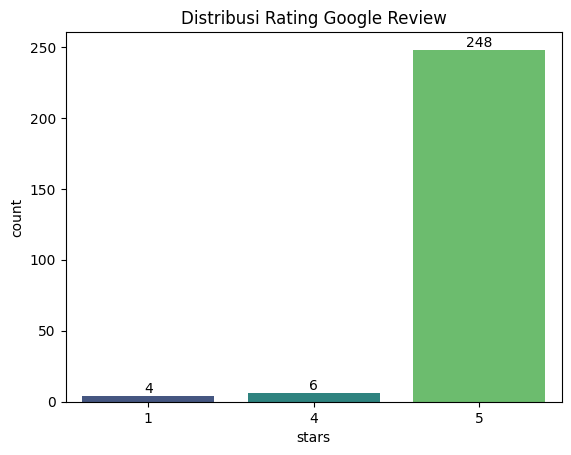

In [5]:
ax = sns.countplot(data=df, x='stars', palette='viridis')
plt.title('Distribusi Rating Google Review')

# Tambahkan angka di atas bar
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.3,
            value,
            ha='center', va='bottom', fontsize=10)

plt.show()



In [6]:
import plotly.express as px

# Rename 'date' to 'created_at' if necessary
if 'publishedAtDate' in df.columns:
    df.rename(columns={'publishedAtDate': 'created_at'}, inplace=True)

# Check if 'created_at' column exists
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])

    # Number of Tweets Over Time
    tweets_over_time = df.groupby(df['created_at'].dt.date).size().reset_index(name='counts')

    fig = px.line(tweets_over_time, x='created_at', y='counts', title='Number of Tweets Over Time')
    fig.show()
else:
    print("Warning: 'created_at' column not found. Skipping time series analysis.")


## pilih kolom relevan

In [7]:
df = df[['stars', 'text', 'created_at']]
df

,stars,text,created_at
0,4,Pelayanan nya bagus,2025-10-28 04:23:07.448000+00:00
1,5,Nice. Pelayanan bagus. Jempol. No kaleng kaleng,2025-10-14 09:17:19.068000+00:00
2,5,"Sangat baik, teknisi bisa diajak konsultasi, p...",2025-10-13 08:31:01.964000+00:00
3,5,NaN,2025-10-09 01:43:49.328000+00:00
4,5,Good pelayanan,2025-10-03 03:34:20.046000+00:00
...,...,...,...
253,5,Best banget fajero\nSolusi masalah kelistrikan...,2022-06-08 00:53:05.830000+00:00
254,5,Solusi masalah listrik,2022-06-08 00:49:23.905000+00:00
255,5,NaN,2022-06-08 00:47:04.524000+00:00
256,5,Tukang Listrik Terbaik di Jember\nTerimakasih ...,2022-06-06 09:11:21.846000+00:00


## Preprocessing

In [8]:
import re
from wordcloud import WordCloud

# NLP tools
!pip install nltk Sastrawi

import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.2 MB/s eta 0:00:00


In [9]:
# Hapus baris yang tidak punya teks
df = df.dropna(subset=['text'])

# Hilangkan duplikasi
df = df.drop_duplicates(subset=['text'])

# Bersihkan teks
def clean_basic(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)   # hapus URL
    text = re.sub(r"[^a-zA-Z\s]", ' ', text)             # hapus angka, simbol, emoji
    text = re.sub(r"\s+", ' ', text).strip()             # hilangkan spasi berlebih
    return text

df['clean_text'] = df['text'].apply(clean_basic)


In [10]:
normalisasi_dict = {
    'gk':'tidak', 'ga':'tidak', 'nggak':'tidak', 'ngga':'tidak',
    'bgt':'banget', 'bnyk':'banyak', 'yg':'yang', 'sdh':'sudah',
    'udh':'sudah', 'dgn':'dengan', 'klo':'kalau', 'dlm':'dalam',
    'dr':'dari', 'tp':'tapi', 'dg':'dengan', 'tdk':'tidak',
    'trs':'terus', 'aja':'saja', 'bisa':'bisa', 'oke':'ok',
    'mantappp':'mantap', 'mantapp':'mantap'
}

def normalize_text(text):
    tokens = text.split()
    tokens = [normalisasi_dict.get(word, word) for word in tokens]
    return ' '.join(tokens)

df['clean_text'] = df['clean_text'].apply(normalize_text)

In [11]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

# Bisa tambah kata tidak penting yang sering muncul di review
extra_stopwords = {'pak', 'bu', 'pt', 'nya', 'nih', 'aja', 'banget'}
stop_words.update(extra_stopwords)

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df

,stars,text,created_at,clean_text
0,4,Pelayanan nya bagus,2025-10-28 04:23:07.448000+00:00,pelayanan bagus
1,5,Nice. Pelayanan bagus. Jempol. No kaleng kaleng,2025-10-14 09:17:19.068000+00:00,nice pelayanan bagus jempol no kaleng kaleng
2,5,"Sangat baik, teknisi bisa diajak konsultasi, p...",2025-10-13 08:31:01.964000+00:00,teknisi diajak konsultasi pengerjaan rapi peng...
4,5,Good pelayanan,2025-10-03 03:34:20.046000+00:00,good pelayanan
7,5,Good quality,2025-09-17 07:05:31.633000+00:00,good quality
...,...,...,...,...
252,5,Energi listrik paling praktis dan murah,2022-06-08 00:53:58.268000+00:00,energi listrik praktis murah
253,5,Best banget fajero\nSolusi masalah kelistrikan...,2022-06-08 00:53:05.830000+00:00,best fajero solusi kelistrikan daerah jember r...
254,5,Solusi masalah listrik,2022-06-08 00:49:23.905000+00:00,solusi listrik
256,5,Tukang Listrik Terbaik di Jember\nTerimakasih ...,2022-06-06 09:11:21.846000+00:00,tukang listrik terbaik jember terimakasih fajero


## labelling

In [13]:
def label_sentiment(star):
    if star <= 3:
        return 'negatif'
    else:
        return 'positif'

df['sentimen'] = df['stars'].apply(label_sentiment)

In [14]:
df

,stars,text,created_at,clean_text,sentimen
0,4,Pelayanan nya bagus,2025-10-28 04:23:07.448000+00:00,pelayanan bagus,positif
1,5,Nice. Pelayanan bagus. Jempol. No kaleng kaleng,2025-10-14 09:17:19.068000+00:00,nice pelayanan bagus jempol no kaleng kaleng,positif
2,5,"Sangat baik, teknisi bisa diajak konsultasi, p...",2025-10-13 08:31:01.964000+00:00,teknisi diajak konsultasi pengerjaan rapi peng...,positif
4,5,Good pelayanan,2025-10-03 03:34:20.046000+00:00,good pelayanan,positif
7,5,Good quality,2025-09-17 07:05:31.633000+00:00,good quality,positif
...,...,...,...,...,...
252,5,Energi listrik paling praktis dan murah,2022-06-08 00:53:58.268000+00:00,energi listrik praktis murah,positif
253,5,Best banget fajero\nSolusi masalah kelistrikan...,2022-06-08 00:53:05.830000+00:00,best fajero solusi kelistrikan daerah jember r...,positif
254,5,Solusi masalah listrik,2022-06-08 00:49:23.905000+00:00,solusi listrik,positif
256,5,Tukang Listrik Terbaik di Jember\nTerimakasih ...,2022-06-06 09:11:21.846000+00:00,tukang listrik terbaik jember terimakasih fajero,positif


/tmp/ipython-input-588262589.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




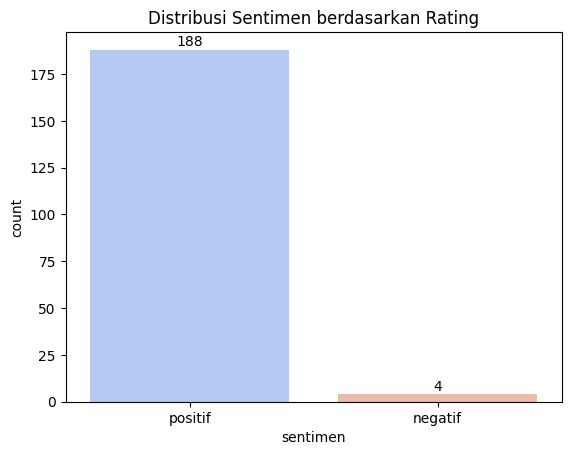

In [15]:
ax = sns.countplot(data=df, x='sentimen', palette='coolwarm')
plt.title('Distribusi Sentimen berdasarkan Rating')

# Tambahkan angka di atas bar
for p in ax.patches:
    value = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.3,
            value,
            ha='center', va='bottom', fontsize=10)

plt.show()


In [16]:
import nltk
nltk.download('punkt_tab')

neg_df = df[df['sentimen'] == 'negatif'].copy()

neg_df['sentences'] = neg_df['clean_text'].apply(lambda x: nltk.sent_tokenize(x))
neg_df[['clean_text','sentences']]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,clean_text,sentences
22,cs wa lambat respon telpon diangkat karyawan c...,[cs wa lambat respon telpon diangkat karyawan ...
23,booking udah kamis senin pagi diganti senin ja...,[booking udah kamis senin pagi diganti senin j...
121,nunggu lbh minggu pasang pln krna kesalahan ve...,[nunggu lbh minggu pasang pln krna kesalahan v...
183,pengalaman mengecewakan mempercayai pengerjaan...,[pengalaman mengecewakan mempercayai pengerjaa...


In [17]:
issue_keywords = ['tidak','buruk','kecewa','lambat','jelek','parah','susah','ribet','batal','lemot']

def extract_issue_sentences(sentences):
    return [s for s in sentences if any(k in s.lower() for k in issue_keywords)]

neg_df['issue_sentences'] = neg_df['sentences'].apply(extract_issue_sentences)
neg_df[['clean_text','issue_sentences']]


,clean_text,issue_sentences
22,cs wa lambat respon telpon diangkat karyawan c...,[cs wa lambat respon telpon diangkat karyawan ...
23,booking udah kamis senin pagi diganti senin ja...,[booking udah kamis senin pagi diganti senin j...
121,nunggu lbh minggu pasang pln krna kesalahan ve...,[]
183,pengalaman mengecewakan mempercayai pengerjaan...,[]


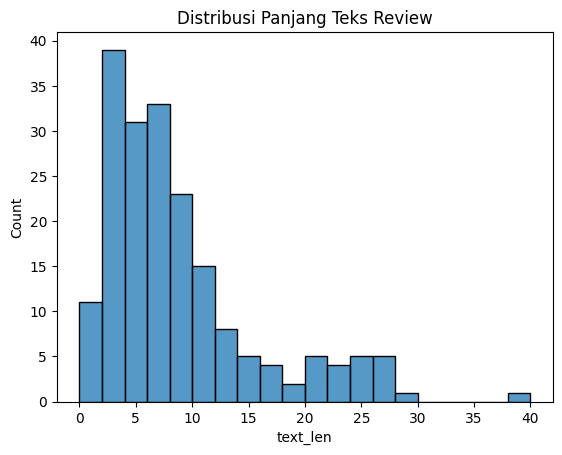

In [18]:
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_len'], bins=20)
plt.title('Distribusi Panjang Teks Review')
plt.show()

In [19]:
positive_text = " ".join(df[df['sentimen']=='positif']['clean_text'])
# neutral_text = " ".join(df[df['sentimen']=='netral']['clean_text'])
negative_text = " ".join(df[df['sentimen']=='negatif']['clean_text'])

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
# Gabungkan semua teks jadi satu string besar
all_words = " ".join(df['clean_text'])

# Pisahkan jadi list kata
tokens = all_words.split()

# Hitung frekuensi
word_freq = Counter(tokens)

# Ambil 20 kata paling sering
common_words = word_freq.most_common(20)

# Ubah ke DataFrame agar mudah divisualisasi
freq_df = pd.DataFrame(common_words, columns=['word', 'count'])

/tmp/ipython-input-3677323504.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




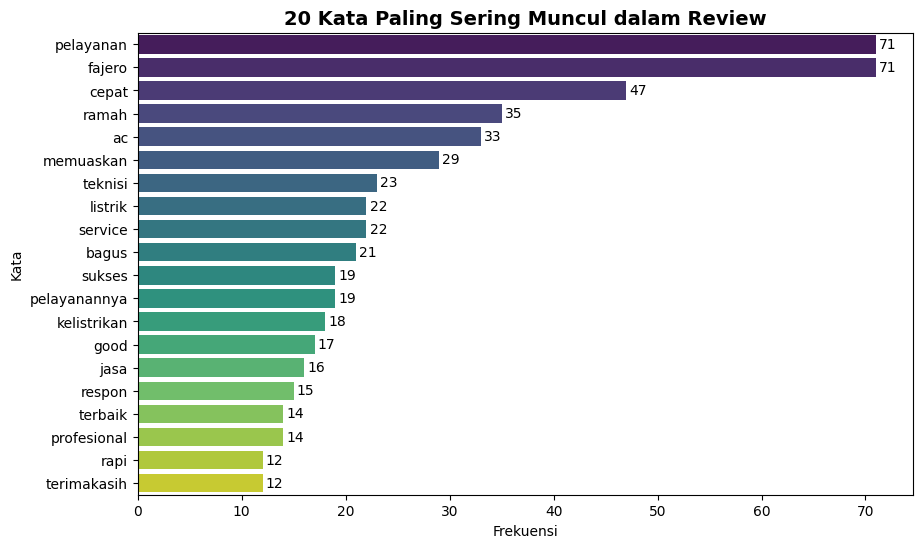

In [22]:
plt.figure(figsize=(10,6))
bars = plt.barh(freq_df['word'], freq_df['count'])

# Tambahkan angka di samping bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, str(width),
             va='center', fontsize=10)
sns.barplot(x='count', y='word', data=freq_df, palette='viridis')
plt.title('20 Kata Paling Sering Muncul dalam Review', fontsize=14, fontweight='bold')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

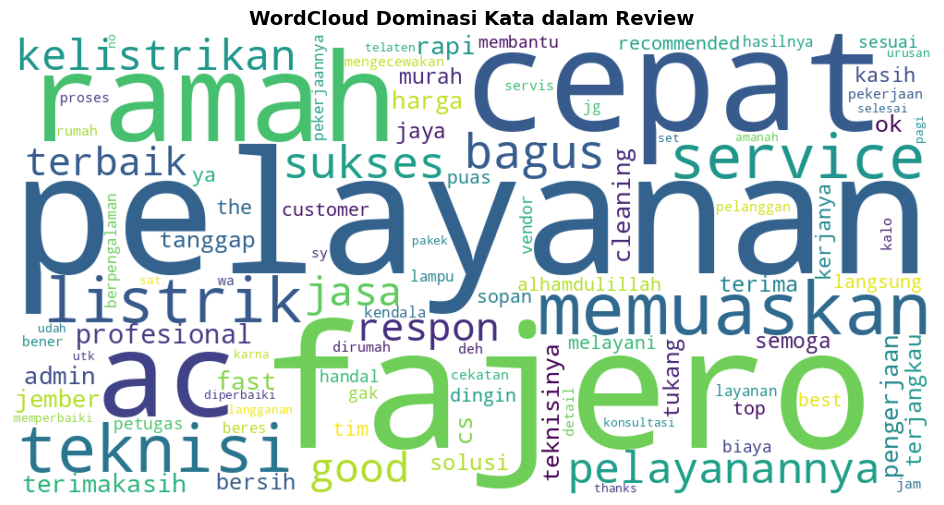

In [23]:
wc = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Dominasi Kata dalam Review', fontsize=14, fontweight='bold')
plt.show()

In [24]:
def plot_ngram_wordcloud(corpus, n=2, title='Bigram WordCloud', bg_color='white', cmap='viridis'):
    """
    Membuat WordCloud berdasarkan n-gram (bigram, trigram, dll)
    """
    # Buat n-gram vectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n))
    X = vectorizer.fit_transform(corpus)

    # Hitung frekuensi kata
    freqs = X.toarray().sum(axis=0)
    vocab = vectorizer.get_feature_names_out()
    freq_dict = dict(zip(vocab, freqs))

    # Buat WordCloud
    wc = WordCloud(width=800, height=400, background_color=bg_color, colormap=cmap)
    wc.generate_from_frequencies(freq_dict)

    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} ({n}-gram)", fontsize=14, fontweight='bold')
    plt.show()

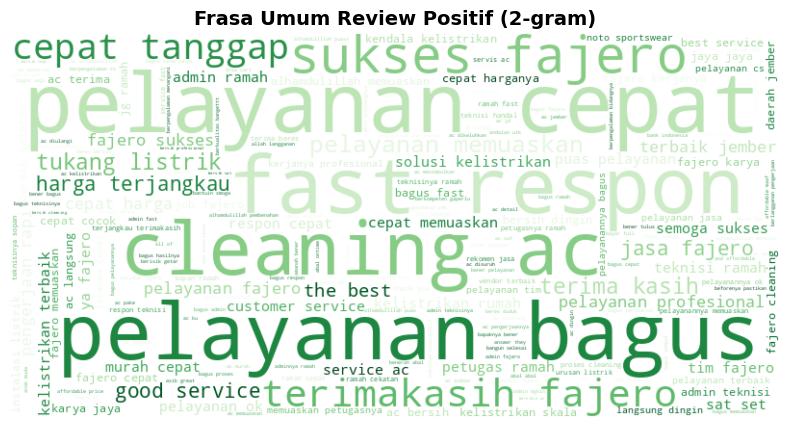

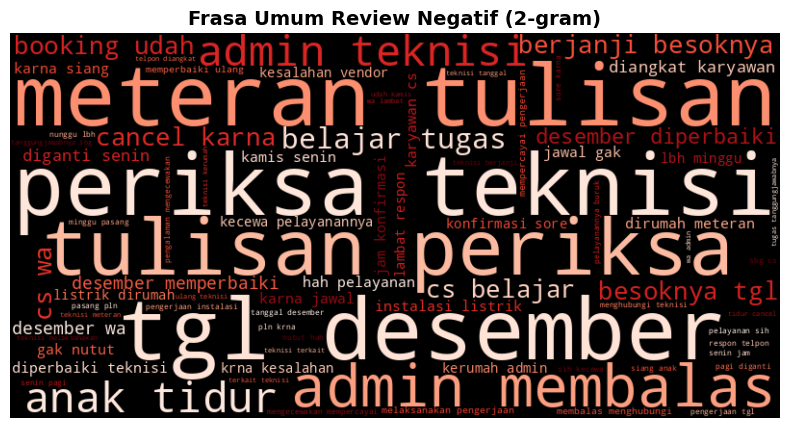

In [25]:
# Dataset hasil preprocessing
positive_corpus = df[df['sentimen']=='positif']['clean_text']
# neutral_corpus  = df[df['sentimen']=='netral']['clean_text']
negative_corpus = df[df['sentimen']=='negatif']['clean_text']

# Bigram WordCloud (2-gram)
plot_ngram_wordcloud(positive_corpus, n=2, title='Frasa Umum Review Positif', bg_color='white', cmap='Greens')
# plot_ngram_wordcloud(neutral_corpus, n=2, title='Frasa Umum Review Netral', bg_color='#f7f7f7', cmap='cividis')
plot_ngram_wordcloud(negative_corpus, n=2, title='Frasa Umum Review Negatif', bg_color='black', cmap='Reds')

# (Opsional) Trigram (3 kata)
# plot_ngram_wordcloud(positive_corpus, n=3, title='Trigram Review Positif')

## NPS

In [26]:
df['nps_score'] = (df['stars'] - 1) * (10 / 4)
df['nps_score'] = df['nps_score'].round().astype(int)

In [27]:
def classify_nps(x):
    if x >= 9:
        return 'Promoter'
    elif x >= 7:
        return 'Passive'
    else:
        return 'Detractor'

df['nps_group'] = df['nps_score'].apply(classify_nps)


In [28]:
promoter = (df['nps_group'] == 'Promoter').mean() * 100
detractor = (df['nps_group'] == 'Detractor').mean() * 100

nps = promoter - detractor
print("NPS:", round(nps, 2))


NPS: 93.75


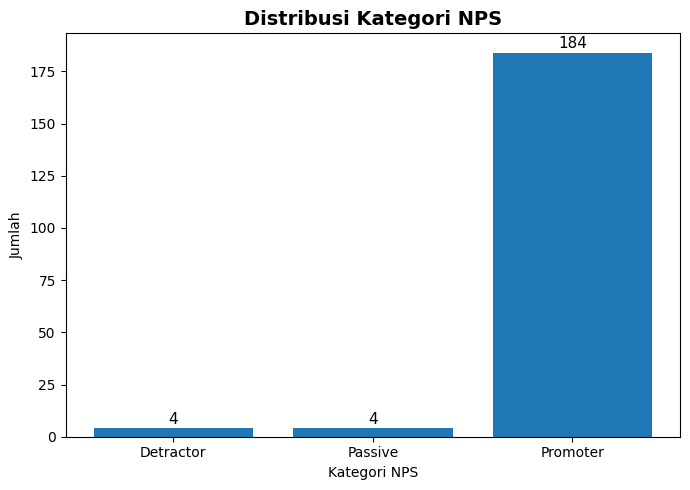

In [29]:
nps_counts = df['nps_group'].value_counts().reindex(['Detractor', 'Passive', 'Promoter']).fillna(0)

plt.figure(figsize=(7,5))
bars = plt.bar(nps_counts.index, nps_counts.values)

# Tambahkan angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)),
             ha='center', va='bottom', fontsize=11)

plt.title('Distribusi Kategori NPS', fontsize=14, fontweight='bold')
plt.xlabel('Kategori NPS')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()


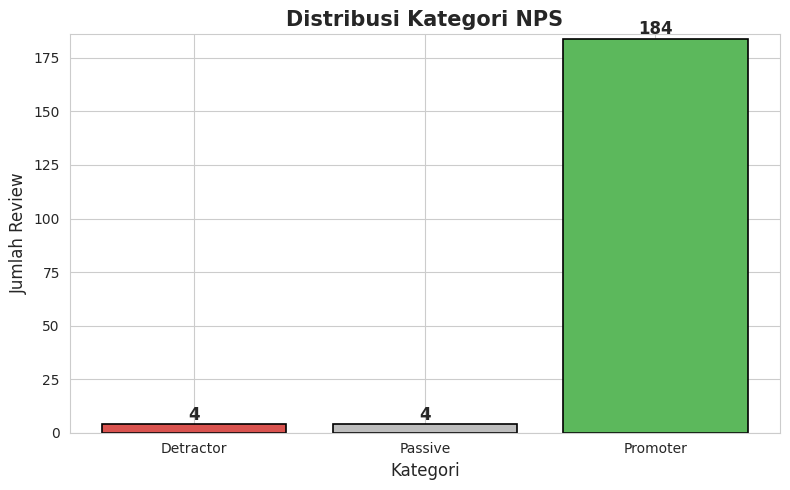

In [48]:
# Style lebih bersih
sns.set_style("whitegrid")

# Warna sesuai kategori NPS
colors = {
    'Detractor': '#D9534F',   # Merah
    'Passive': '#BDBDBD',     # Abu netral
    'Promoter': '#5CB85C'     # Hijau
}

nps_counts = df['nps_group'].value_counts().reindex(['Detractor', 'Passive', 'Promoter']).fillna(0)

plt.figure(figsize=(8,5))
bars = plt.bar(nps_counts.index, nps_counts.values,
               color=[colors[i] for i in nps_counts.index],
               edgecolor='black', linewidth=1.2)

# Tambahkan angka di atas bar
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.3, str(int(y)),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribusi Kategori NPS', fontsize=15, fontweight='bold')
plt.ylabel('Jumlah Review', fontsize=12)
plt.xlabel('Kategori', fontsize=12)
plt.ylim(0, max(nps_counts.values) + 2)

plt.tight_layout()
plt.show()

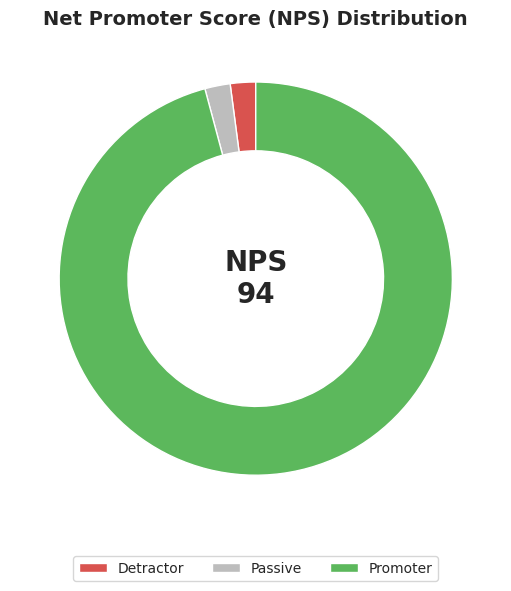

In [45]:

nps_counts = df['nps_group'].value_counts().reindex(['Detractor', 'Passive', 'Promoter']).fillna(0)

sizes = nps_counts.values
labels = nps_counts.index

colors = ['#D9534F', '#BDBDBD', '#5CB85C']  # merah, abu, hijau

# Hitung skor NPS
promoters = nps_counts['Promoter']
detractors = nps_counts['Detractor']
nps_score = round((promoters - detractors) / nps_counts.sum() * 100)

plt.figure(figsize=(6,6))
wedges, texts = plt.pie(sizes, colors=colors, startangle=90, wedgeprops={'width':0.35, 'edgecolor':'white'})

# NPS Score di tengah
plt.text(0, 0, f"NPS\n{nps_score}", ha='center', va='center', fontsize=20, fontweight='bold')

plt.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.title('Net Promoter Score (NPS) Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


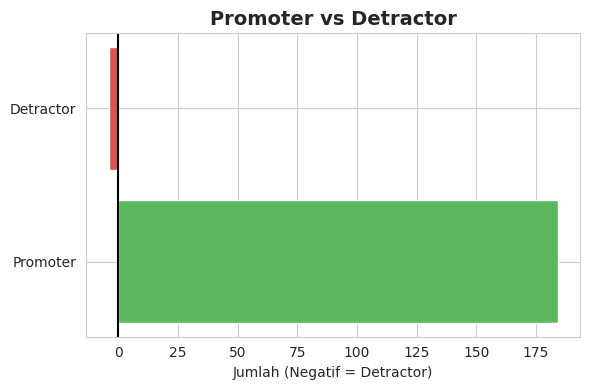

In [47]:
prom = nps_counts['Promoter']
det = nps_counts['Detractor']

plt.figure(figsize=(6,4))
plt.barh(['Promoter'], [prom], color='#5CB85C')
plt.barh(['Detractor'], [-det], color='#D9534F')

plt.title("Promoter vs Detractor", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah (Negatif = Detractor)")
plt.axvline(0, color='black')
plt.tight_layout()
plt.show()


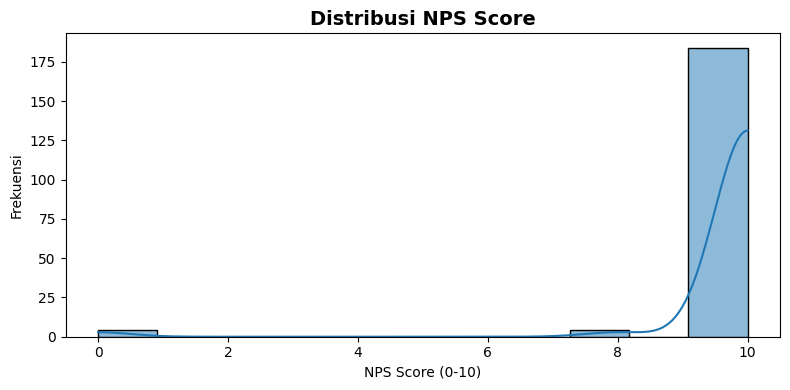

In [30]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['nps_score'], bins=11, kde=True)
plt.title('Distribusi NPS Score', fontsize=14, fontweight='bold')
plt.xlabel('NPS Score (0-10)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()


In [31]:
df

,stars,text,created_at,clean_text,sentimen,text_len,nps_score,nps_group
0,4,Pelayanan nya bagus,2025-10-28 04:23:07.448000+00:00,pelayanan bagus,positif,2,8,Passive
1,5,Nice. Pelayanan bagus. Jempol. No kaleng kaleng,2025-10-14 09:17:19.068000+00:00,nice pelayanan bagus jempol no kaleng kaleng,positif,7,10,Promoter
2,5,"Sangat baik, teknisi bisa diajak konsultasi, p...",2025-10-13 08:31:01.964000+00:00,teknisi diajak konsultasi pengerjaan rapi peng...,positif,12,10,Promoter
4,5,Good pelayanan,2025-10-03 03:34:20.046000+00:00,good pelayanan,positif,2,10,Promoter
7,5,Good quality,2025-09-17 07:05:31.633000+00:00,good quality,positif,2,10,Promoter
...,...,...,...,...,...,...,...,...
252,5,Energi listrik paling praktis dan murah,2022-06-08 00:53:58.268000+00:00,energi listrik praktis murah,positif,4,10,Promoter
253,5,Best banget fajero\nSolusi masalah kelistrikan...,2022-06-08 00:53:05.830000+00:00,best fajero solusi kelistrikan daerah jember r...,positif,8,10,Promoter
254,5,Solusi masalah listrik,2022-06-08 00:49:23.905000+00:00,solusi listrik,positif,2,10,Promoter
256,5,Tukang Listrik Terbaik di Jember\nTerimakasih ...,2022-06-06 09:11:21.846000+00:00,tukang listrik terbaik jember terimakasih fajero,positif,6,10,Promoter


In [32]:
import pandas as pd
import plotly.express as px

# Pastikan kolom timestamp sudah datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

# Hitung jumlah review per sentimen per hari (long format → cocok untuk Plotly)
trend_df = df.groupby(['date', 'sentimen']).size().reset_index(name='count')

# Visualisasi interaktif
fig = px.line(
    trend_df,
    x='date',
    y='count',
    color='sentimen',
    markers=True,
    title='Trend Sentimen Berdasarkan Waktu'
)

fig.update_layout(
    xaxis_title='Tanggal',
    yaxis_title='Jumlah Review',
    hovermode='x unified'
)

fig.show()


## word trend

In [33]:
import pandas as pd
from collections import Counter
import plotly.express as px

# Pastikan timestamp berbentuk datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

# Tokenisasi per baris
df['tokens'] = df['clean_text'].apply(lambda x: x.split())

# Ubah menjadi satu kata per baris
words_df = df.explode('tokens')[['date', 'tokens']]

# Hitung total frekuensi kata
word_freq = Counter(words_df['tokens'])
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])

# Ambil hanya 20 kata teratas
top_words = freq_df['word'].tolist()
filtered_words = words_df[words_df['tokens'].isin(top_words)]

# Hitung frekuensi kata per tanggal
trend_df = filtered_words.groupby(['date', 'tokens']).size().reset_index(name='count')

# Terapkan rolling mean
trend_df['date'] = pd.to_datetime(trend_df['date'])
trend_df = trend_df.sort_values('date')

trend_df['rolling_count'] = trend_df.groupby('tokens')['count'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# Visualisasi Interaktif Plotly
fig = px.line(
    trend_df,
    x='date',
    y='rolling_count',
    color='tokens',
    title='Trend Kemunculan 20 Kata Teratas (7-Day Rolling Mean)',
    markers=False
)

fig.update_layout(
    xaxis_title='Tanggal',
    yaxis_title='Frekuensi (Rolling Mean)',
    legend_title='Kata',
    hovermode='x unified'
)

fig.show()


In [34]:
import pandas as pd
from collections import Counter
import plotly.express as px

# Pastikan timestamp berbentuk datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

# Tokenisasi per baris
df['tokens'] = df['clean_text'].apply(lambda x: x.split())

# Ubah menjadi satu kata per baris
words_df = df.explode('tokens')[['date', 'tokens']]

# Hitung total frekuensi kata
word_freq = Counter(words_df['tokens'])
freq_df = pd.DataFrame(word_freq.most_common(20), columns=['word', 'count'])

# Ambil hanya 20 kata teratas
top_words = freq_df['word'].tolist()
filtered_words = words_df[words_df['tokens'].isin(top_words)]

# Hitung frekuensi kata per tanggal
trend_df = filtered_words.groupby(['date', 'tokens']).size().reset_index(name='count')

# Terapkan rolling mean (7 hari)
trend_df['date'] = pd.to_datetime(trend_df['date'])
trend_df = trend_df.sort_values('date')

trend_df['rolling_count'] = trend_df.groupby('tokens')['count'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean()
)

# ======== FACET PLOT ==========
fig = px.line(
    trend_df,
    x='date',
    y='rolling_count',
    facet_col='tokens',
    facet_col_wrap=4,      # jumlah kolom per baris (bisa ubah 3 / 4 / 5)
    height=800,
    title='Trend Kemunculan 20 Kata Teratas (7-Day Rolling Mean) - Per Kata'
)

fig.update_layout(
    showlegend=False,
    xaxis_title='Tanggal',
    yaxis_title='Frekuensi (Rolling Mean)',
)

# Rotasi label tanggal agar mudah dibaca
fig.update_xaxes(tickangle=45)

fig.show()


## Review Negatif EDA

In [41]:
df_neg = df[df['sentimen'] == 'negatif'][['text', 'sentimen', 'created_at']]
df_neg

,text,sentimen,created_at
22,CS di wa lambat respon dan telpon tidak diangk...,negatif,2025-06-20 02:33:57.962000+00:00
23,"Booking udah dari hari Kamis buat senin pagi, ...",negatif,2025-06-09 07:13:49.866000+00:00
121,Saya nunggu lbh dari 2 Minggu pasang baru PLN ...,negatif,2023-12-23 12:54:40.014000+00:00
183,Pengalaman yg sangat mengecewakan saat memperc...,negatif,2023-01-10 12:39:06.435000+00:00


In [38]:
def categorize_issue(text):
    text = text.lower()
    if "cs" in text or "respon" in text:
        return "Customer Service / Respons Lambat"
    elif "jadwal" in text or "konfirmasi" in text:
        return "Manajemen Jadwal / Koordinasi Buruk"
    elif "pasang baru" in text or "nunggu" in text or "2 minggu" in text:
        return "Lama Proses / Lead Time"
    elif "teknisi" in text or "kembali" in text or "follow" in text:
        return "Keandalan Teknisi / Follow-up Buruk"
    else:
        return "Lainnya"

df_neg = df[df['sentimen'] == 'negatif'].copy()
df_neg['kategori'] = df_neg['text'].apply(categorize_issue)

In [39]:
count = df_neg['kategori'].value_counts()
print(count)

kategori
Customer Service / Respons Lambat      1
Manajemen Jadwal / Koordinasi Buruk    1
Lama Proses / Lead Time                1
Keandalan Teknisi / Follow-up Buruk    1
Name: count, dtype: int64


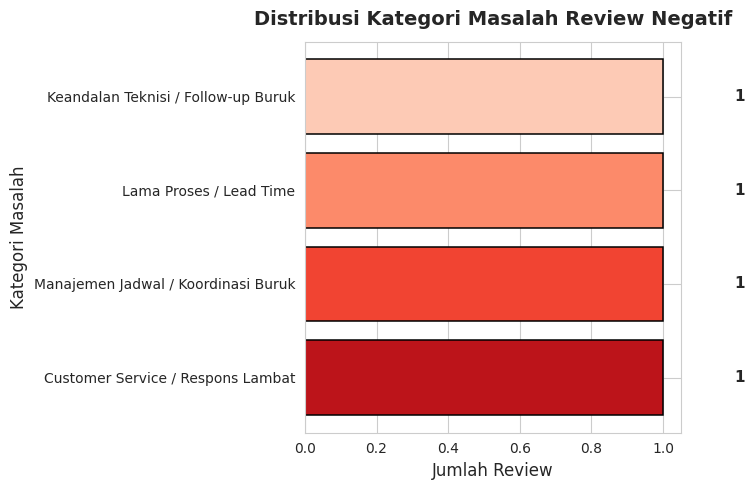

In [54]:
sns.set_style("whitegrid")

colors = sns.color_palette("Reds_r", len(count))

plt.figure(figsize=(8, 5))
bars = plt.barh(count.index, count.values, color=colors, edgecolor='black', linewidth=1.1)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             str(width), va='center', fontsize=11, fontweight='bold')

plt.title("Distribusi Kategori Masalah Review Negatif", fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Jumlah Review", fontsize=12)
plt.ylabel("Kategori Masalah", fontsize=12)

plt.tight_layout()
plt.show()

In [42]:
# Pastikan kolom created_at bertipe datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Filter data negatif
df_neg = df[df['sentimen'] == 'negatif'].copy()

# Ambil Year-Month (misal: 2023-01, 2025-06)
df_neg['year_month'] = df_neg['created_at'].dt.to_period('M').astype(str)

# Hitung jumlah review negatif per bulan
neg_trend = df_neg.groupby('year_month').size().reset_index(name='count')

/tmp/ipython-input-4072134431.py:8: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



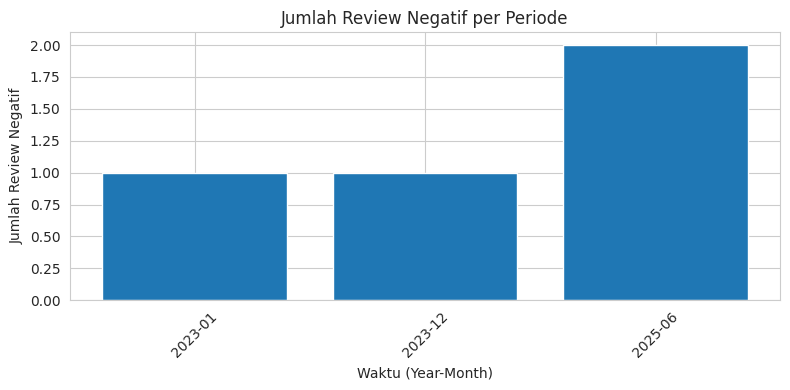

In [53]:
plt.figure(figsize=(8,4))
plt.bar(neg_trend['year_month'], neg_trend['count'])
plt.title('Jumlah Review Negatif per Periode')
plt.xlabel('Waktu (Year-Month)')
plt.ylabel('Jumlah Review Negatif')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
